<a href="https://colab.research.google.com/github/Dcal-dev/For-Study/blob/master/For_Study_Dynamics%20NEW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 프로그램을 공부하려고 처음 만들어본 COLAB

---

시작일 19.11.23

---








공부할거 
 RK4 룽게-쿠타 방법

 컴퓨터 활용능력

 Getpy


#프로그램의 기초 분야
* 프론트엔드(front-end) 
>이용자의 웹브라우저에서 직접적으로 보이는 부분을 다루는 기술들 - HTML5, CSS3, 기본 JavaScript

* 백엔드(back-end) 
>웹브라우저가 주고받는 데이터를 기록하고 가져오는 등의 뒷 단의 궂은 일을 처리하는 기술들
* 데이터베이스(database) 
>백엔드가 다루는 데이터를 보관하고 검색해 오는 기술
* 네트워크(network) 
>여러 컴퓨터 사이의 데이터 통신에 필요한 기술들
* 에디터/툴/버전관리 시스템(tools) 
>각 주제 개발 작업에 필요한 도구들 선택과 활용
* 기초 자료 구조(data structure) 
>프론트엔드나 백엔드 프로그래밍 모두에 쓰이는 기초 지식. 데이터를 원하는 형태로 찾기 좋게 연결하는 구조.
* 리눅스/도커/AWS 
>백엔드와 데이터베이스를 운영할 기술과 환경




시작은 간단한거 부터

In [0]:
print("hello python")
print("Hello",end=' ')
print("alph")

hello python
Hello alph


print라는 명령어에 여러가지 옵션을 추가할수 있다.


#RETARDING FORCE 
___
도전 : 19.11.24 23:06
___
cf: [Matplotlib Tutorial 16 - Live graphs](https://www.youtube.com/watch?v=ZmYPzESC5YY)

cf: [Model Your World with the GlowScript Trinket](https://trinket.io/glowscript/1e541a5795) : 대충 이런 형태가 목표

참고 서적 : Classical Dynamics of partivels and systems (MARION) (p.58~71)
* retarding force는 kmv로만 적용한다.


##BULLET

*주의! 같은 단어를 사용하게 된다면 colab에서는 한단어로 인식해주기 때문에 초기화하는 작업이 필요함

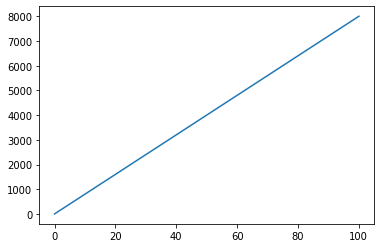

In [0]:
#@title 
import matplotlib.pyplot as plt
from math import cos,exp

#for non retarding force in 1d motion
x0=0
t=0
x=0
xarr=[]
xarr.append(x0)

tarr=[]
tarr.append(t)
v0=80
dt=0.05
dx=v0*dt

while t<=100:
  t+=dt
  x=x+dx
  xarr.append(x)
  tarr.append(t)
  
  
plt.plot(tarr,xarr)
plt.show()




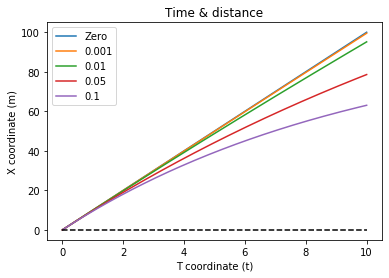

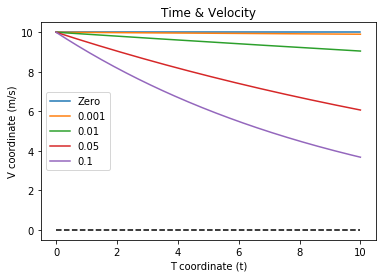

In [0]:
#@title retarding force 가 v에 비례할경우
from math import exp
from matplotlib import pyplot as plt

class bullet:
    def __init__(self,v0,x0,k,timelimit):
        self.v=v0
        self.v0=v0
        self.x=x0
        self.k=k

        self.t=0
        
        self.time=0
        self.timelimit=timelimit
        self.varr=[self.v]
        self.xarr=[self.x]
        self.tarr=[self.t]

    def updateT(self, dt):
        self.t+=dt
        return self.t

    def updateV(self, dt):
        self.v=self.v0*(exp(-self.k*self.updateT(dt)))
        
        return self.v

    def updateX(self, dt):
        self.x=self.x+self.updateV(dt)*dt
        
        return self.x

    def step(self, dt):
        self.xarr.append(self.updateX(dt))
        self.time=self.time+dt
        self.tarr.append(self.time)
        self.varr.append(self.v)
        return

def MakeShoot(v0,x0,k,timelimit):
    Bullet=bullet(v0,x0,k,timelimit)
    dt=0.05

    while Bullet.time<=timelimit:
        Bullet.step(dt)

    return Bullet.tarr,Bullet.xarr,Bullet.varr

def main():
    tl=10
    v0=10
    x0=0
    TZero,XZero,VZero   = MakeShoot(v0,x0,0.000,tl)
    T0_001,X0_001,V0_001= MakeShoot(v0,x0,0.001,tl)
    T0_01,X0_01,V0_01   = MakeShoot(v0,x0,0.01,tl)
    T0_05,X0_05,V0_05   = MakeShoot(v0,x0,0.05,tl)
    T0_1,X0_1,V0_1      = MakeShoot(v0,x0,0.1,tl)
    plt.figure("Time & distance")
    plt.plot(TZero,XZero, T0_001,X0_001, T0_01,X0_01, 
             T0_05,X0_05, T0_1,X0_1,
             [0, tl], [0, 0],'k--')
    plt.title("Time & distance")
    plt.legend(['Zero', '0.001', '0.01','0.05','0.1'])
    plt.xlabel('T coordinate (t)')
    plt.ylabel('X coordinate (m)')
    plt.show("Time & distance")
    plt.figure("Time & Velocity")
    plt.plot(TZero,VZero, T0_001,V0_001, T0_01,V0_01, 
             T0_05,V0_05, T0_1,V0_1,
             [0, tl], [0, 0],'k--')
    plt.title("Time & Velocity")
    plt.legend(['Zero', '0.001', '0.01','0.05','0.1'])
    plt.xlabel('T coordinate (t)')
    plt.ylabel('V coordinate (m/s)')
    plt.show("Time & Velocity")

if __name__ == '__main__':
    main()



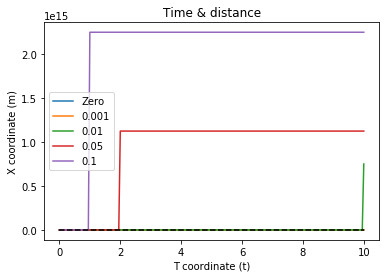

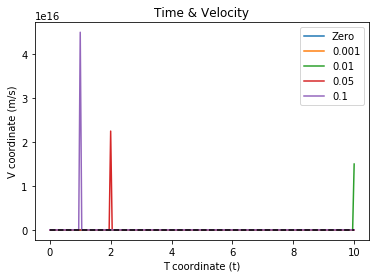

In [0]:
#@title retarding force 가 v의 제곱일 경우

from math import exp
from matplotlib import pyplot as plt

class bulletDuble:
    def __init__(self,v0,x0,k,timelimit):
        self.v=v0
        self.v0=v0
        self.x=x0
        self.k=k

        self.t=0
        
        self.time=0
        self.timelimit=timelimit
        self.varr=[self.v]
        self.xarr=[self.x]
        self.tarr=[self.t]

    def updateT(self, dt):
        self.t+=dt
        return self.t

    def updateV(self, dt):
        self.v=self.v0/(self.v0*self.k*self.updateT(dt)-1)
        
        return self.v

    def updateX(self, dt):
        self.x=self.x+self.updateV(dt)*dt
        
        return self.x

    def step(self, dt):
        self.xarr.append(self.updateX(dt))
        self.time=self.time+dt
        self.tarr.append(self.time)
        self.varr.append(self.v)
        return

def MakeShoot(v0,x0,k,timelimit):
    Bullet=bulletDuble(v0,x0,k,timelimit)
    dt=0.05

    while Bullet.time<=timelimit:
        Bullet.step(dt)

    return Bullet.tarr,Bullet.xarr,Bullet.varr

def main():
    tl=10
    v0=10
    x0=0
    TZero,XZero,VZero   = MakeShoot(v0,x0,0.000,tl)
    T0_001,X0_001,V0_001= MakeShoot(v0,x0,0.001,tl)
    T0_01,X0_01,V0_01   = MakeShoot(v0,x0,0.01,tl)
    T0_05,X0_05,V0_05   = MakeShoot(v0,x0,0.05,tl)
    T0_1,X0_1,V0_1      = MakeShoot(v0,x0,0.1,tl)
    plt.figure("Time & distance")
    plt.plot(TZero,XZero, T0_001,X0_001, T0_01,X0_01, 
             T0_05,X0_05, T0_1,X0_1,
             [0, tl], [0, 0],'k--')
    plt.title("Time & distance")
    plt.legend(['Zero', '0.001', '0.01','0.05','0.1'])
    plt.xlabel('T coordinate (t)')
    plt.ylabel('X coordinate (m)')
    plt.show("Time & distance")
    plt.figure("Time & Velocity")
    plt.plot(TZero,VZero, T0_001,V0_001, T0_01,V0_01, 
             T0_05,V0_05, T0_1,V0_1,
             [0, tl], [0, 0],'k--')
    plt.title("Time & Velocity")
    plt.legend(['Zero', '0.001', '0.01','0.05','0.1'])
    plt.xlabel('T coordinate (t)')
    plt.ylabel('V coordinate (m/s)')
    plt.show("Time & Velocity")

if __name__ == '__main__':
    main()



##PROJECTILE MOTION

Q. python에서 벡터를 구현할수 있을까?

A.리스트를 사용하면 구할수 있지 않을까? 

-> 실패, 리스트끼리 더하면 요소가 추가되어 버린다.

In [0]:
v=[80,80]
a=[0,-9.8]
print(v+a)

[80, 80, 0, -9.8]


numpy를 이용하여 리스트를 어레이로 만들고 더한다.

7.249999999999982


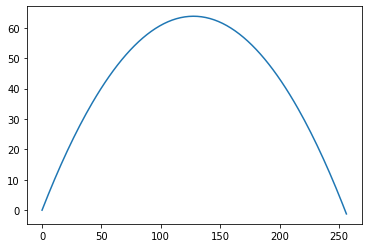

In [0]:
import numpy as np
from math import radians,sin,cos,pi
import matplotlib.pyplot as plt
deg=45
theta=deg*pi/180
v0=50
v=v0*np.array([cos(theta),sin(theta)])
a=np.array([0,-9.8])
#print(v*a)
#print((v*a)[0],(v*a)[1])

v0=v
t=0
dt=0.05
x0=0
y0=0
X=[x0]
Y=[y0]
while True:
    t+=dt
    x= v*t+0.5*a*t**2
    X.append(x[0])
    Y.append(x[1])
    if x[1]<=0: break
    

    #print(x)

print(t)
plt.figure(1)
plt.plot(X,Y)
plt.show(1)



     4.100
     5.800
     7.100
     7.900


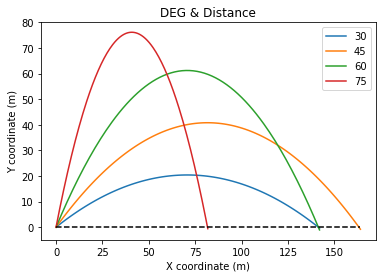

In [0]:
#자 이제 클레스를 사용해서 만들어 보자.
import matplotlib.pyplot as plt
import numpy as np
from math import exp, sin, cos, radians, pi
class pow:
    def __init__(self,x0,y0,v0,deg):
        self.theta=deg*pi/180
        self.v=v0*np.array([cos(self.theta),sin(self.theta)])
        self.a=np.array([0,-9.8])
        self.t=0
        self.x=x0
        self.y=y0
        self.DP=np.array([x0,y0])
        
        self.xarr=[self.DP[0]]
        self.yarr=[self.DP[1]]
    
    def updateDP(self,t):
        self.DP=self.v*t+0.5*self.a*t**2
        return self.DP[0],self.DP[1]
    
    def step(self,dt):
        self.t=self.t+dt
        self.x,self.y=self.updateDP(self.t)
        self.xarr.append(self.x)
        self.yarr.append(self.y)
        return

def MS(x0,y0,v0,deg):
    POW=pow(x0,y0,v0,deg)
    dt=0.05
    while POW.y>=0:
        POW.step(dt)
    return POW.xarr,POW.yarr,POW.t


def main():
    x0=0
    y0=0
    v0=40
    
    X30,Y30,T30=MS(x0,y0,v0,30)
    X45,Y45,T45=MS(x0,y0,v0,45)
    X60,Y60,T60=MS(x0,y0,v0,60)
    X75,Y75,T75=MS(x0,y0,v0,75)
    plt.figure()
    plt.title("DEG & Distance")
    
    plt.xlabel('X coordinate (m)')
    plt.ylabel('Y coordinate (m)')
    
    plt.plot(X30,Y30, X45,Y45, X60,Y60, X75,Y75,
             [0, X45[-1]], [0, 0],'k--')
    plt.legend(['30','45','60','75'])
    for X in [T30,T45,T60,T75]:
        print("%10.3f"%X)
    plt.show()


if __name__=='__main__':
    main()




##Retarding Force가 존재할때

    11.950
    11.850
    11.050
    10.350


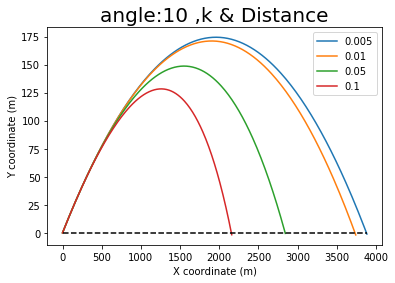

In [0]:
import matplotlib.pyplot as plt
import numpy as np
from math import exp, sin, cos, pi
class pow_re:
    def __init__(self,x0,y0,v0,deg,k):
        self.theta=deg*pi/180
        self.v=v0*np.array([cos(self.theta),sin(self.theta)])
        self.k=k
        self.t=0
        self.x=x0
        self.x0=x0
        self.y0=y0
        self.y=y0
        self.DP=np.array([x0,y0])
        self.g=9.8
        self.xarr=[self.DP[0]]
        self.yarr=[self.DP[1]]
    
    def updateDP(self,t):
        self.x=self.x0+self.v[0]/self.k*(1-exp(-self.k*t))
        self.y=self.y0-self.g*t/self.k+(self.k*self.v[1]+self.g)/(self.k**2)*(1-exp(-self.k*t))
        return self.x,self.y
    
    def step(self,dt):
        self.t=self.t+dt
        self.x,self.y=self.updateDP(self.t)
        self.xarr.append(self.x)
        self.yarr.append(self.y)
        return

def MS(x0,y0,v0,deg,k):
    POW=pow_re(x0,y0,v0,deg,k)
    dt=0.05
    while POW.y>=0:
        POW.step(dt)
    return POW.xarr,POW.yarr,POW.t


def main():
    x0=0
    y0=0
    v0=340
    ang=10
    
    X45_005,Y45_005,T45_005=MS(x0,y0,v0,ang,0.005)
    X45_01,Y45_01,T45_01=MS(x0,y0,v0,ang,0.01)
    X45_05,Y45_05,T45_05=MS(x0,y0,v0,ang,0.05)
    X45_1,Y45_1,T45_1=MS(x0,y0,v0,ang,0.1)
    plt.figure()
    plt.title("angle:%s ,k & Distance"%ang,fontsize=20)
    
    plt.xlabel('X coordinate (m)')
    plt.ylabel('Y coordinate (m)')
    
    plt.plot(X45_005,Y45_005,X45_01,Y45_01,X45_05,Y45_05,
             X45_1,Y45_1,
             [0, X45_005[-1]], [0, 0],'k--')
    plt.legend(['0.005','0.01','0.05','0.1'])
    for X in [T45_005,T45_01,T45_05,T45_1]:
        print("%10.3f"%X)
    plt.show()
    
if __name__=='__main__':
    main()


##움직이는 물체의 공기저항
물체의 공기저항과 마찰력을 생각해 보았을때 정지하는 시간과 이동거리는 어떻게 나올까?

물체가 움직일떼 마찰력이 없다면, 멈추지 않고 계속 나아간다. 하지만 공기저항이 있는경우에는 위에서 했던겄처럼 속도가 느려지지만 멈추지는 않는다. 그렇다면 둘다있다면 어떻게 될것인가?

    26.550
    25.000
    17.700
    13.450


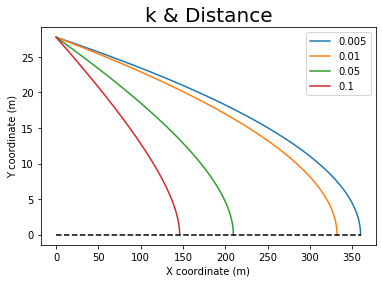

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from math import exp

class CAR:
    def __init__(self,x0,v0,myu,k):
        self.x0=x0
        self.v=v0
        self.v0=v0
        self.k=k
        self.m=myu
        self.g=9.8
        self.t=0
        self.xarr=[self.x0]
        self.varr=[self.v0]
    def updateV(self,t):
        self.v=(self.k*self.v0+self.m*self.g)/self.k*exp(-self.k*t)-self.m*self.g/self.k
        return self.v
    def updateX(self,t):
        self.x=self.x0+(self.k*self.v0+self.m*self.g)/(self.k**2)*(1-exp(-self.k*t))-self.m*self.g*t/self.k
        return self.x
    def step(self,dt):
        self.t+=dt
        v=self.updateV(self.t)
        x=self.updateX(self.t)
        self.xarr.append(x)
        self.varr.append(v)
        return

def MS(x0,v0,myu,k):
    Car=CAR(x0,v0,myu,k)
    dt=0.05
    while Car.v>=0:
        Car.step(dt)
    return Car.xarr,Car.varr,Car.t

#여기서 부터 좀더 수정하기
def main():
    x0=0
    vh=100
    v0=vh*10/36
    myu=0.1

    
    X45_005,Y45_005,T45_005=MS(x0,v0,myu,0.005)
    X45_01,Y45_01,T45_01=MS(x0,v0,myu,0.01)
    X45_05,Y45_05,T45_05=MS(x0,v0,myu,0.05)
    X45_1,Y45_1,T45_1=MS(x0,v0,myu,0.1)
    plt.figure()
    plt.title("k & Distance",fontsize=20)
    
    plt.xlabel('X coordinate (m)')
    plt.ylabel('Y coordinate (m)')
    
    plt.plot(X45_005,Y45_005,X45_01,Y45_01,X45_05,Y45_05,
             X45_1,Y45_1,
             [0, X45_005[-1]], [0, 0],'k--')
    plt.legend(['0.005','0.01','0.05','0.1'])
    for X in [T45_005,T45_01,T45_05,T45_1]:
        print("%10.3f"%X)
    plt.show()
    
if __name__=='__main__':
    main()

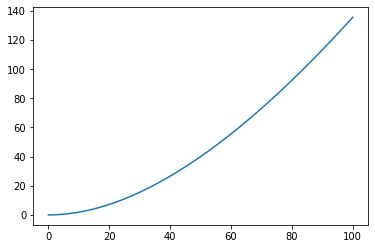

In [0]:
import numpy as np
import matplotlib.pyplot as plt



def distance(v0,myu,k):
    m=myu
    g=9.8
    vh=v0*10/36
    return vh/k-m*g/(k**2)*np.log(k*vh/(m*g)+1)
x=np.linspace(0,100,1000)
m=0.2
k=0.05

plt.figure()
plt.plot(x,distance(x,m,k))
plt.show()


##sympy 쓰는것을 배우자

[0.3        0.28968966 0.27937931 0.26906897 0.25875862 0.24844828
 0.23813793 0.22782759 0.21751724 0.2072069  0.19689655 0.18658621
 0.17627586 0.16596552 0.15565517 0.14534483 0.13503448 0.12472414
 0.11441379 0.10410345 0.0937931  0.08348276 0.07317241 0.06286207
 0.05255172 0.04224138 0.03193103 0.02162069 0.01131034 0.001     ]


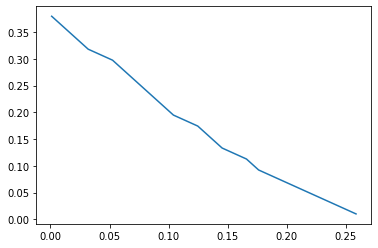

In [0]:
from sympy import *
import numpy as np
import matplotlib.pyplot as plt
K=np.linspace(0.3,0.001,30)
print(K)
M=np.linspace(0.4,0.01,20)
#X,Y=np.meshgrid(x,y)

x,y,z=symbols('x y z')
v0=symbols('v0')
k=0.05
vh=v0/3.6
m=0.2
g=9.8


f=100-vh/k+m*g/(k**2)*log(k*vh/(m*g)+1)
#fz=100-vh/X+Y*g/(X**2)*log(X*vh/(Y*g)+1)

def func(f):
    vh=v0/3.6
    g=9.8
    return 100-vh/f[0]+f[1]*g/(f[0]**2)*log(f[0]*vh/(f[1]*g)+1)
#Z=solve(fz,v0)[1]
#print(Z)
Ov_k=[]
Ov_m=[]
for y in M:
    km=[K[-1],y]
    sol=solve(func(km),v0)[1]
    if sol>100:
        pass
    else: 
        for x in K:
            km=[x,y]
            sol=solve(func(km),v0)[1]
            if sol<100:
                Ov_k.append(x)
                Ov_m.append(y)
                break
            pass

plt.plot(Ov_k,Ov_m)
plt.show()
#영역을 설정해 주는것을 찾아보자
#영역의 안

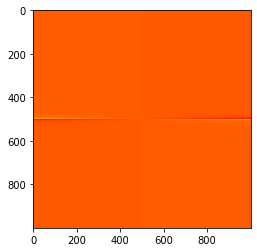

In [0]:
import numpy as np
import matplotlib.pyplot as plt
x=np.linspace(-100,100,1000)
y=np.linspace(-100,100,1000)
X,Y=np.meshgrid(x,y)
Z=X/Y
plt.imshow(Z,cmap='hot')

##matplotlib animation사용법

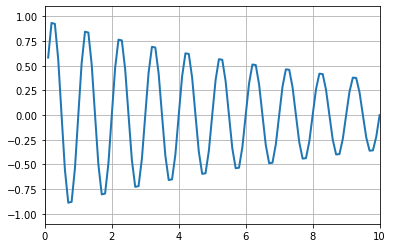

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

def data_gen(t=0):
    cnt = 0
    while cnt < 1000:
        cnt += 1
        t += 0.1
        yield t, np.sin(2*np.pi*t) * np.exp(-t/10.)


def init():
    ax.set_ylim(-1.1, 1.1)
    ax.set_xlim(0, 10)
    del xdata[:]
    del ydata[:]
    line.set_data(xdata, ydata)
    return line,

fig, ax = plt.subplots()
line, = ax.plot([], [], lw=2)
ax.grid()
xdata, ydata = [], []


def run(data):
    # update the data
    t, y = data
    xdata.append(t)
    ydata.append(y)
    xmin, xmax = ax.get_xlim()

    if t >= xmax:
        ax.set_xlim(xmin, 2*xmax)
        ax.figure.canvas.draw()
    line.set_data(xdata, ydata)

    return line,

ani = animation.FuncAnimation(fig, run, data_gen, blit=True, interval=10,
                              repeat=False, init_func=init)


HTML(ani.to_html5_video())

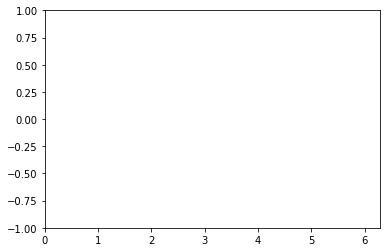

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
fig, ax = plt.subplots()
xdata, ydata = [], []
ln, = plt.plot([], [], 'ro')

def init():
    ax.set_xlim(0, 2*np.pi)
    ax.set_ylim(-1, 1)
    return ln,

def update(frame):
    xdata.append(frame)
    ydata.append(np.sin(frame))
    ln.set_data(xdata, ydata)
    return ln,

ani = FuncAnimation(fig, update, frames=np.linspace(0, 2*np.pi, 128),
                    init_func=init, blit=True)
plt.show()
HTML(ani.to_html5_video())

##LEGRANGIAN METHOD for COMPLEX MOVEMENT

라그랑지안 방법을 사용하면 복잡한 움직임을 보다 쉽게 물체의 움직임을 나타낼수있다.
2차 미방을 수치적인 방법을 통해서 풀수있다.

In [0]:
#참고적으로 찾아본 방법
#Program Of Runge-Kutta 4th Order
from math import *

def f(t,y):
    return sin(y**t)
def main():
    t0,y0=float(input("initial time:")),float(input("initial value:"))
    h=float(input("interval size:"))
    t=float(input("terminal time:"))
    print("t\ty\n",'_'*16)
    while t0<t:
        k1=h*f(t0,y0)
        k2=h*f(t0+h/2.,y0+k1/2.)
        k3=h*f(t0+h/2.,y0+k2/2.)
        k4=h*f(t0+h,y0+k3)
        y1,t1=y0+h/6.*(k1+(2*k2)+(2*k3)+k4),t0+h
        print("%.4f\t%.4f"%(t1,y1))
        t0,y0=t1,y1
main()


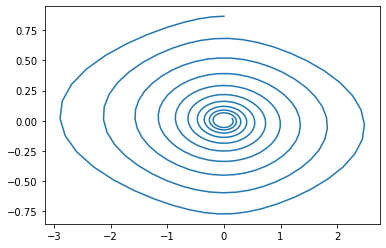

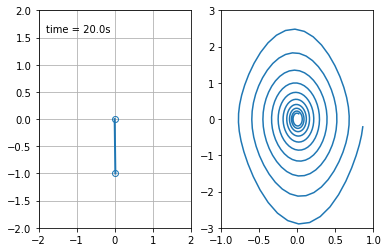

In [0]:
#single pendulum
import matplotlib.pyplot as plt
import scipy.integrate as integrate
import numpy as np
from IPython.display import HTML
import matplotlib.animation as animation

from numpy import pi,sin,cos


G=9.8
L=1
b=0.3
m=1
def simple_pe(state,t):
    dxdt=np.zeros_like(state)
    dxdt[0]=state[1]
    dxdt[1]=(-b/m)*state[1]-G/L*sin(state[0])
    return dxdt

ini_theta=60
ini_omega=0

state=np.radians([ini_theta,ini_omega])

dt=0.05
t=np.arange(0,20,dt)

INT=integrate.odeint(simple_pe,state,t)
x=L*sin(INT[:,0])
y=-L*cos(INT[:,0])

dxdt=L*cos(INT[:,0])*INT[:,1]
dydt=L*sin(INT[:,0])*INT[:,1]
plt.figure("dxdt,x")
plt.plot(dxdt,x)
plt.show("dxdt,x")


colors = [[1,0,0,0],[1,0,0,0.4],[0,0.8,0.6,0.9]]
cmap = LinearSegmentedColormap.from_list("", colors)



fig = plt.figure()
ax = fig.add_subplot(121, autoscale_on=False, xlim=(-2, 2), ylim=(-2, 2))
ax.grid()

ax2 = fig.add_subplot(122,xlim=(-1, 1), ylim=(-3, 3))
cache= ax.scatter([], [],c=[], cmap=cmap, vmin=0,vmax=1,lw=0.01)



line, = ax.plot([], [], 'o-', lw=2,markerfacecolor="None")

line2, = ax2.plot([],[])
time_template = 'time = %.1fs'
time_text = ax.text(0.05, 0.9, '', transform=ax.transAxes)

def init():
    line.set_data([], [])
    time_text.set_text('')
    return line, time_text

X=[]
dXdt=[]

CX=[]
CY=[]

inte=[]
def animate(i):
    global inte
    thisx = [0, x[i]]
    thisy = [0, y[i]]

    line.set_data(thisx, thisy)
    time_text.set_text(time_template % (i*dt))
    X.append(x[i])
    CX.append(x[i])
    CY.append(y[i])
    dXdt.append(dxdt[i])
    line2.set_data(X,dXdt)
    cache.set_offsets(np.c_[CX,CY])
    inte= np.concatenate((np.array(inte)*0.985, np.ones(len(CX))))
    cache.set_array(inte)




    return line,line2, cache, time_text

ani = animation.FuncAnimation(fig, animate, np.arange(1, len(INT)),
                              interval=25, blit=True, init_func=init)
#plt.show()
#ani.save('double_pendulum.mp4', fps=15)
HTML(ani.to_html5_video())

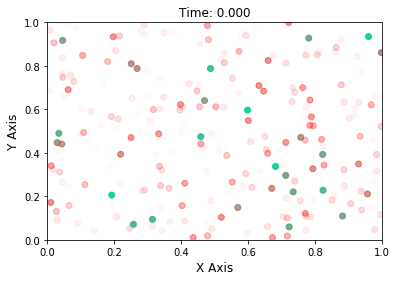

In [5]:
###참고한 코드###
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation
from matplotlib.colors import LinearSegmentedColormap
from IPython.display import HTML
fig, ax = plt.subplots()
ax.set_xlabel('X Axis', size = 12)
ax.set_ylabel('Y Axis', size = 12)
ax.axis([0,1,0,1])
x_vals = []
y_vals = []
intensity = []
iterations = 100

t_vals = np.linspace(0,10, iterations)

colors = [[1,0,0,0],[1,0,0,0.4],[0,0.8,0.6,0.9]]
## rgb alpha
cmap = LinearSegmentedColormap.from_list("", colors)
#scatter = ax.scatter(x_vals,y_vals, c=[], cmap=cmap, vmin=0,vmax=1)

scatter = ax.scatter(x_vals,y_vals, c=[], cmap=cmap, vmin=0,vmax=1)

def get_new_vals():
    n = np.random.randint(1,5)
    x = np.random.rand(n)
    y = np.random.rand(n)
    return list(x), list(y)

def update(t):
    global x_vals, y_vals, intensity
    # Get intermediate points
    new_xvals, new_yvals = get_new_vals()
    x_vals.extend(new_xvals)
    y_vals.extend(new_yvals)

    # Put new values in your plot
    scatter.set_offsets(np.c_[x_vals,y_vals])
    # np.c_ : 행렬 붙이가


    #calculate new color values
    intensity = np.concatenate((np.array(intensity)*0.96, np.ones(len(new_xvals))))
    scatter.set_array(intensity)
    #set_array ==색을 설정해 주는 메소드

    # Set title
    ax.set_title('Time: %0.3f' %t)

ani = matplotlib.animation.FuncAnimation(fig, update, frames=t_vals,interval=50)
HTML(ani.to_html5_video())

#DOUBLE PENDULUM

In [0]:
import matplotlib.pyplot as plt
import scipy.integrate as integrate
import numpy as np
from IPython.display import HTML
import matplotlib.animation as animation

from numpy import pi,sin,cos

G=9.8
L1=1
L2=1


m1=1
m2=2

the1=170
ome1=0
the2=172
ome2=0

state=np.radians([the1,ome1,the2,ome2])

def doub_pen(state,t):
    dxdt=np.zeros_like(state)
    dxdt[0]=state[1]
    dxdt[2]=state[3]
    alp1=L2/L1*(m2/(m1+m2))*cos(state[0]-state[2])
    alp2=L1/L2*cos(state[0]-state[2])
    f1=-L2/L1*(m2/(m1+m2))*(state[3]**2)*sin(state[0]-state[2])-G/L1*sin(state[0])
    f2=L1/L2*(state[1]**2)*sin(state[0]-state[2])-G/L2*sin(state[2])
    g1=(f1-alp1*f2)/(1-alp1*alp2)
    g2=(-alp2*f1+f2)/(1-alp1*alp2)
    dxdt[1]=g1
    dxdt[3]=g2
    return dxdt

dt=0.05
t=np.arange(0,100,dt)

INT=integrate.odeint(doub_pen,state,t)
x1=L1*sin(INT[:,0])
y1=-L1*cos(INT[:,0])

x2=x1+L2*sin(INT[:,2])
y2=y1-L2*cos(INT[:,2])

dx1dt=L1*cos(INT[:,0])*INT[:,1]
dy1dt=L1*sin(INT[:,0])*INT[:,1]

dx2dt=dx1dt+L2*cos(INT[:,2])*INT[:,3]
dy2dt=dy1dt+L2*sin(INT[:,2])*INT[:,3]
'''
plt.figure("dxdt,x")
plt.plot(dxdt,x)
plt.show("dxdt,x")
'''

MAXdx=max(dx2dt)
MAXx=max(x2)
colors = [[1,0,0,0],[1,0,0,0.4],[0,0.8,0.6,0.9]]
cmap = LinearSegmentedColormap.from_list("", colors)

fig = plt.figure()
ax = fig.add_subplot(121, autoscale_on=False, xlim=(-(L1+L2)*1.5, (L1+L2)*1.5), 
                     ylim=(-(L1+L2)*1.5, (L1+L2)*1.5))
ax.grid()

ax2 = fig.add_subplot(122,xlim=(-MAXx*1.1, MAXx*1.1), ylim=(-MAXdx*1.1, MAXdx*1.1))
cache, = ax.plot([], [],'k',lw=1,alpha=0.5)



line, = ax.plot([], [], 'ro-', lw=3,markerfacecolor="None")

line2, = ax2.plot([],[])
time_template = 'time = %.1fs'
time_text = ax.text(0.05, 0.9, '', transform=ax.transAxes)

def init():
    line.set_data([], [])
    time_text.set_text('')
    return line, time_text

X=[]
dXdt=[]

CX=[]
CY=[]

inte=[]
def animate(i):
    global inte
    thisx = [0, x1[i],x2[i]]
    thisy = [0, y1[i],y2[i]]

    line.set_data(thisx, thisy)
    time_text.set_text(time_template % (i*dt))
    X.append(x2[i])
    CX.append(x2[i])
    CY.append(y2[i])
    dXdt.append(dx2dt[i])
    line2.set_data(X,dXdt)
    cache.set_data(CX,CY)
    '''
    그래프 형식이 scatter일때
    cache.set_offsets(np.c_[CX,CY])
    inte= np.concatenate((np.array(inte)*0.985, np.ones(len(CX))))
    
    cache.set_array(inte)

'''


    return line,line2, cache, time_text

ani = animation.FuncAnimation(fig, animate, np.arange(1, len(INT)),
                              interval=50/4, blit=True, init_func=init)
#plt.show()
#ani.save('double_pendulum.mp4', fps=15)
HTML(ani.to_html5_video())


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.


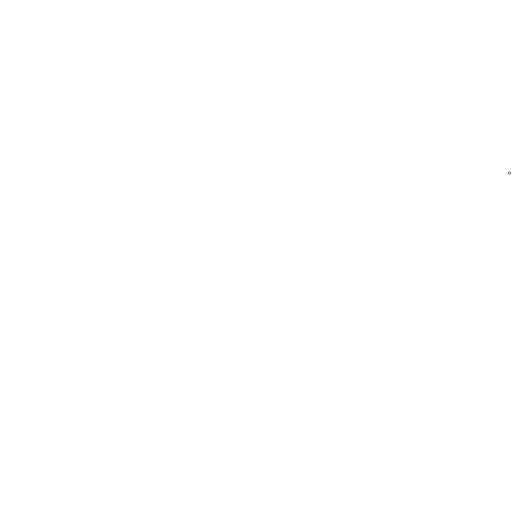

NameError: ignored

In [0]:
####sclab###
"""
===============
Rain simulation
===============

Simulates rain drops on a surface by animating the scale and opacity
of 50 scatter points.

Author: Nicolas P. Rougier
"""
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython import html

# Create new Figure and an Axes which fills it.
fig = plt.figure(figsize=(7, 7))
ax = fig.add_axes([0, 0, 1, 1], frameon=False)
ax.set_xlim(0, 1), ax.set_xticks([])
ax.set_ylim(0, 1), ax.set_yticks([])

# Create rain data
n_drops = 50
rain_drops = np.zeros(n_drops, dtype=[('position', float, 2),
                                      ('size',     float, 1),
                                      ('growth',   float, 1),
                                      ('color',    float, 4)])

# Initialize the raindrops in random positions and with
# random growth rates.
rain_drops['position'] = np.random.uniform(0, 1, (n_drops, 2))
rain_drops['growth'] = np.random.uniform(50, 200, n_drops)

# Construct the scatter which we will update during animation
# as the raindrops develop.
scat = ax.scatter(rain_drops['position'][:, 0], rain_drops['position'][:, 1],
                  s=rain_drops['size'], lw=0.5, edgecolors=rain_drops['color'],
                  facecolors='none')


def update(frame_number):
    # Get an index which we can use to re-spawn the oldest raindrop.
    current_index = frame_number % n_drops

    # Make all colors more transparent as time progresses.
    rain_drops['color'][:, 3] -= 1.0/len(rain_drops)
    rain_drops['color'][:, 3] = np.clip(rain_drops['color'][:, 3], 0, 1)

    # Make all circles bigger.
    rain_drops['size'] += rain_drops['growth']

    # Pick a new position for oldest rain drop, resetting its size,
    # color and growth factor.
    rain_drops['position'][current_index] = np.random.uniform(0, 1, 2)
    rain_drops['size'][current_index] = 5
    rain_drops['color'][current_index] = (0, 0, 0, 1)
    rain_drops['growth'][current_index] = np.random.uniform(50, 200)

    # Update the scatter collection, with the new colors, sizes and positions.
    scat.set_edgecolors(rain_drops['color'])
    scat.set_sizes(rain_drops['size'])
    scat.set_offsets(rain_drops['position'])


# Construct the animation, using the update function as the animation
# director.
animation = FuncAnimation(fig, update, interval=10)
plt.show()
HTML(animation.to_html5_video())

# 파이썬을 제대로 공부해보자


---


cf:[wiki docs](https://wikidocs.net/17684)

cf:[school webs](http://schoolofweb.net/blog/posts/파이썬-퍼스트클래스-함수-first-class-function/)


---


> **추천 에디터**  : 
*   비주얼 스투디오(visual studio)
*   파이참(pycharm)









## **wikidocs 점프투 파이썬** 


### 02-2 문자열 자료형
>이스케이프 코드 
* \n	문자열 안에서 줄을 바꿀 때 사용
* \t	문자열 사이에 탭 간격을 줄 때 사용
* \\	문자 \를 그대로 표현할 때 사용
* \'	작은따옴표(')를 그대로 표현할 때 사용
* \"	큰따옴표(")를 그대로 표현할 때 사용
* \r	캐리지 리턴(줄 바꿈 문자, 현재 커서를 가장 앞으로 이동)
* \f	폼 피드(줄 바꿈 문자, 현재 커서를 다음 줄로 이동)
* \a	벨 소리(출력할 때 PC 스피커에서 '삑' 소리가 난다)
* \b	백 스페이스
* \000	널 문자



In [0]:

ec_code=['\"change line" \n',
         '\"tab\"\t',
         '\"bell sound\"\a',
         '\"back space\"\b\b\b'
         '\"null word\"\000']
for ec in ec_code:
    print("\'"'hello priend',ec, 'How are you'"\'")


'hello priend "change line" 
 How are you'
'hello priend "tab"	 How are you'
'hello priend "bell sound" How are you'
'hello priend "back space""null word"  How are you'
'hello priend "form feed" and then How are you'


**format 함수를 이용한 문자 포메팅과 함수**


In [0]:
a=f'\'{0:^10}\''
b=f'{"hi"*10:*^30}' # :< 왼쪽 정렬, :>오른쪽 정렬 :^가운데 정렬
print(a)
print(b)

'    0     '
*****hihihihihihihihihihi*****


In [0]:
#문자열관련 함수들
'''
문자의 수를 세어주는 count
특정한 문자를 찾아주는 find
'''
cont= 'I have a dream a sing to song\nI can see the wonder'
find=cont.find('have')  #포함하는 글자중 제일 처음
index=cont.index(' ')   #잘못하면 에러남


1 1 1


마지막 공부한 곳 https://wikidocs.net/13 upper 부분

# 코딩 조각들 모음

##이중으로된 반복문 빠져나가기

In [0]:
#이중으로 된 반복문을 특별한 goto, if, 변수없이 중단하는 방법이다.
#실행하는 개수가 많을때 쓸만할꺼 같다.
for i in range(5000):
    for j in range(3000):
        if j > 1000:
           break
    else: 
        continue # no break encountered
    break